 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [219]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [220]:
# Reading whale returns
whale_returns = Path("Resources/whale_returns.csv")

whale_df = pd.read_csv(whale_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)

whale_df.sort_index(ascending=True,inplace=True)

whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [221]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [222]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [223]:
# Reading algorithmic returns
algo_returns = Path("Resources/algo_returns.csv")

algo_df = pd.read_csv(algo_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)

algo_df.sort_index(ascending=True,inplace=True)

algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [224]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [225]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [226]:
# Reading S&P 500 Closing Prices
sp500_close = Path("Resources/sp500_history.csv")

sp500_df = pd.read_csv(sp500_close, index_col="Date", parse_dates=True, infer_datetime_format=True)

sp500_df.sort_index(ascending=True,inplace=True)

sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [227]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [228]:
# Fix Data Types
sp500_df["Close"]= sp500_df["Close"].str.replace("$","",regex=True).astype("float")
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [229]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()

sp500_returns.sort_index(ascending=True,inplace=True)

sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [230]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [231]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.columns = ['S&P 500']
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [232]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

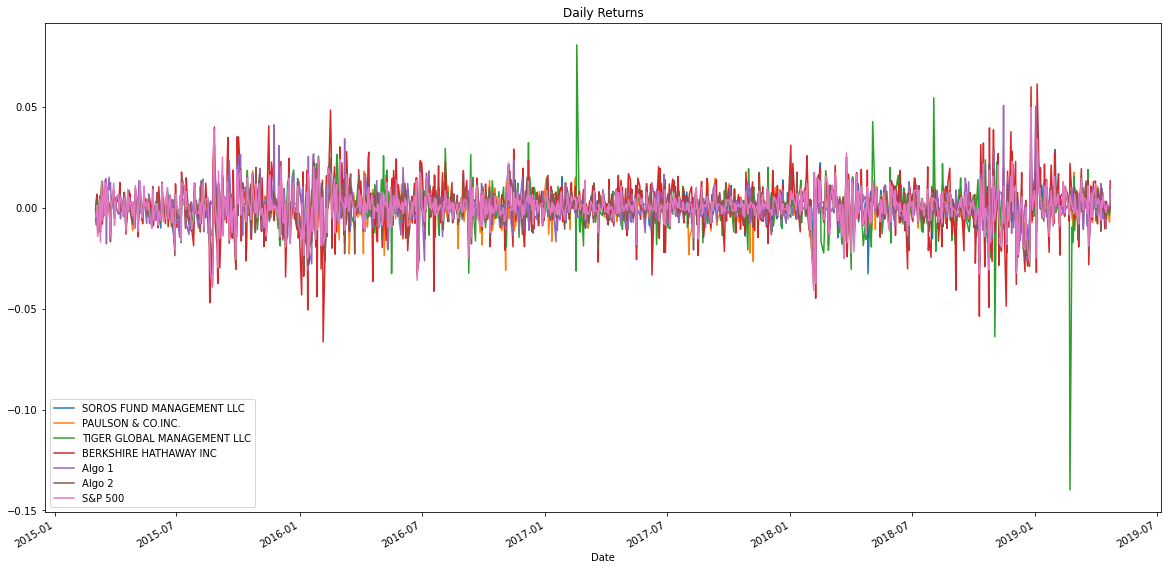

In [233]:
# Plot daily returns of all portfolios
combined_df.plot(title='Daily Returns', figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

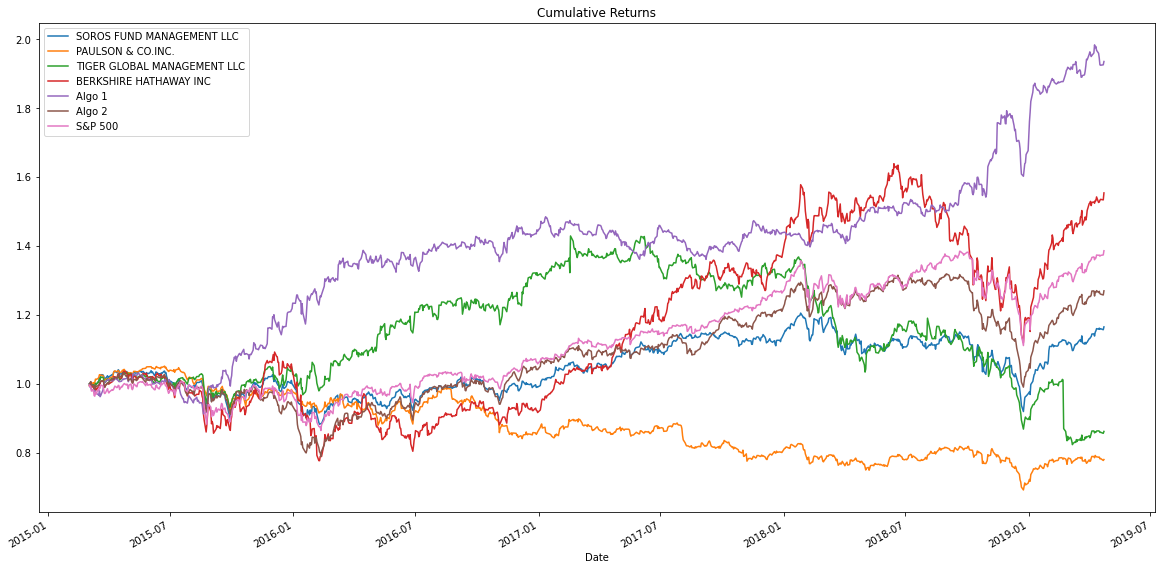

In [234]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns

# Plot cumulative returns
cumulative_returns.plot(title='Cumulative Returns', figsize=(20,10)) 

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

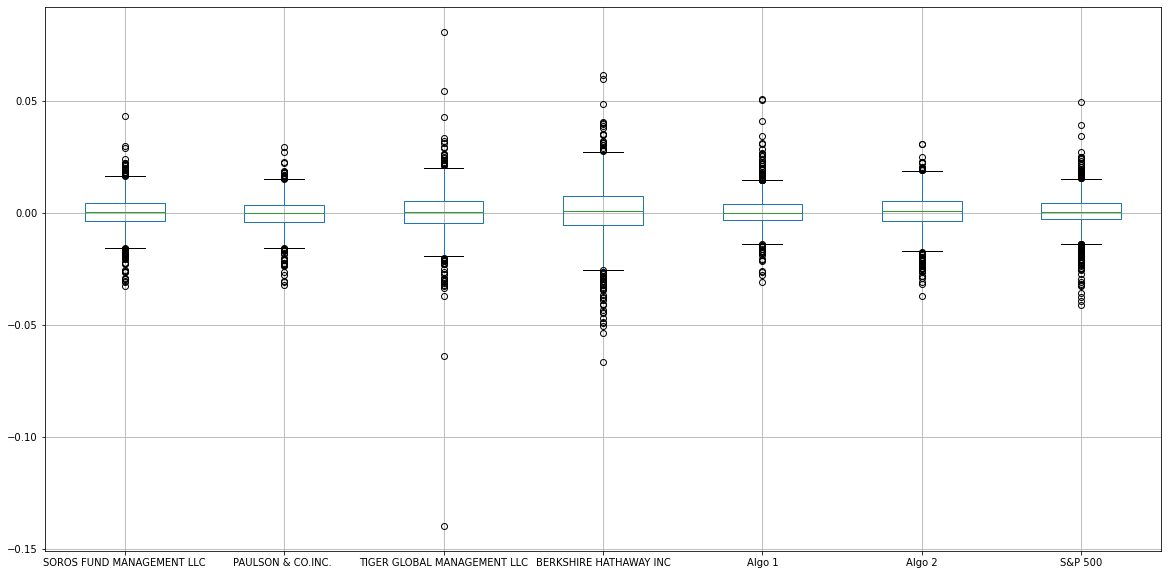

In [235]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [236]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_df.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [237]:
# Calculate  the daily standard deviation of S&P 500
combined_std['S&P 500']
# Determine which portfolios are riskier than the S&P 500
combined_std > combined_std['S&P 500']

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [238]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

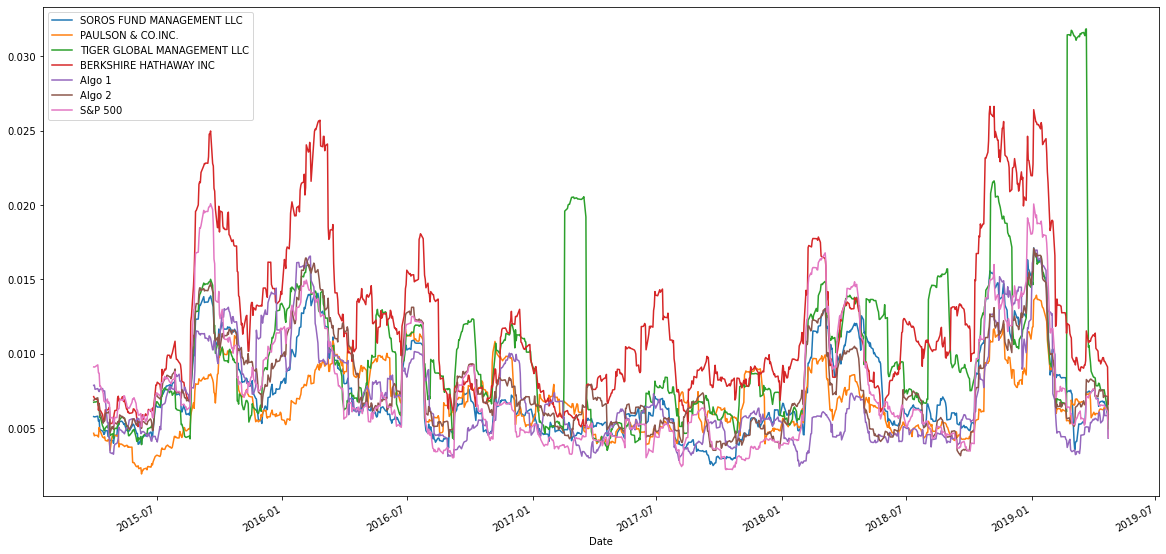

In [239]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

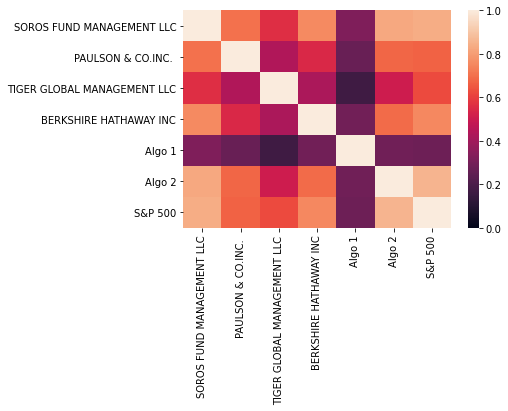

In [240]:
# Calculate the correlation
correlation = combined_df.corr()

# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin =0, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'60-Day Algo 2 Beta Trend'}, xlabel='Date'>

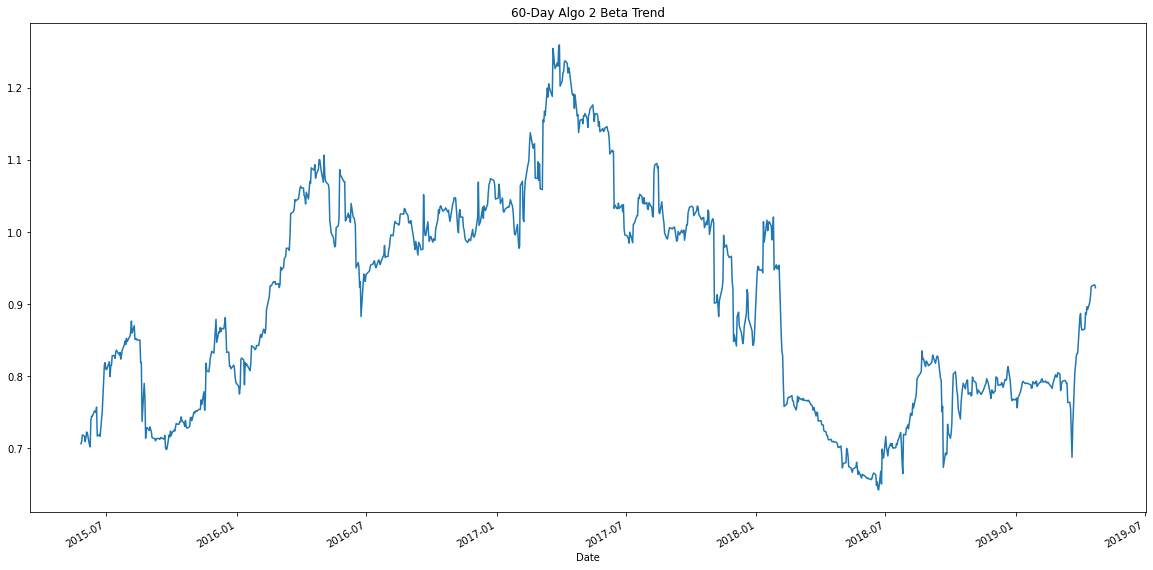

In [241]:
# Calculate covariance of a single portfolio
covariance = combined_df['Algo 2'].rolling(window=60).cov(combined_df['S&P 500'])

# Calculate variance of S&P 500
variance = combined_df['S&P 500'].rolling(window=60).var()

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(title='60-Day Algo 2 Beta Trend', figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [242]:
# Use `ewm` to calculate the rolling window
ewm = combined_df.ewm(halflife=21).mean()
ewm.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.004462
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.002514
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005575
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.003543


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [243]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / annualized_std
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

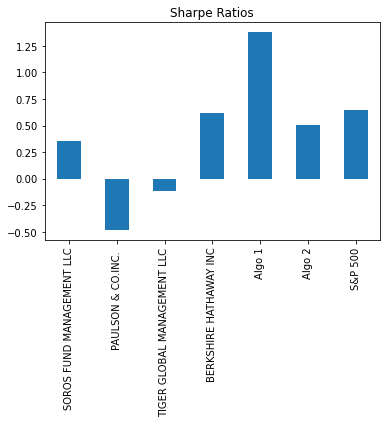

In [244]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 outperformed both the S&P 500 and the whale's portfolios, but Algo 2 was outperformed by the S&P 500 and Berkshire Hathaway Inc.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [245]:
# Reading data from 1st stock
goog_historical = Path("Resources/goog_historical.csv")

goog_df = pd.read_csv(goog_historical, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

goog_df.drop(columns=["Symbol"], inplace=True)

goog_df.rename(columns = {"NOCP":"GOOG"}, inplace = True)

goog_df.sort_index(ascending=True,inplace=True)

goog_df.head()

,GOOG
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [246]:
# Reading data from 2nd stock
aapl_historical = Path("Resources/aapl_historical.csv")

aapl_df = pd.read_csv(aapl_historical, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

aapl_df.drop(columns=["Symbol"], inplace=True)

aapl_df.rename(columns = {"NOCP":"AAPL"}, inplace = True)

aapl_df.sort_index(ascending=True,inplace=True)

aapl_df.head()

,AAPL
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [247]:
# Reading data from 3rd stock
cost_historical = Path("Resources/cost_historical.csv")

cost_df = pd.read_csv(cost_historical, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

cost_df.drop(columns=["Symbol"], inplace=True)

cost_df.rename(columns = {"NOCP":"COST"}, inplace = True)

cost_df.sort_index(ascending=True,inplace=True)

cost_df.head()

,COST
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [248]:
# Combine all stocks in a single DataFrame
portfolio_df = pd.concat([goog_df, aapl_df, cost_df], axis="columns", join="inner")
portfolio_df.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [249]:
# Reset Date index
portfolio_df.reset_index()

,Trade DATE,GOOG,AAPL,COST
0,2018-05-11,1098.26,188.59,195.76
1,2018-05-14,1100.20,188.15,195.88
2,2018-05-15,1079.23,186.44,195.48
3,2018-05-16,1081.77,188.18,198.71
4,2018-05-17,1078.59,186.99,199.60
...,...,...,...,...
245,2019-05-03,1185.40,211.75,244.62
246,2019-05-06,1189.39,208.48,244.23
247,2019-05-07,1174.10,202.86,240.18
248,2019-05-08,1166.27,202.90,241.34


In [250]:
# Reorganize portfolio data by having a column per symbol
portfolio_df.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [269]:
# Calculate daily returns
portfolio_returns = portfolio_df.pct_change()
portfolio_returns.head()

# Drop NAs
portfolio_returns.dropna(inplace=True)

# Display sample data
portfolio_returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [270]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_returns = portfolio_returns.dot(weights)

# Display sample data
custom_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [271]:
# Join your returns DataFrame to the original returns DataFrame
joined_df = pd.concat([combined_df, custom_returns], axis="columns", join="inner")
joined_df.rename(columns={ joined_df.columns[7]: "Custom Portfolio" }, inplace=True)
joined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [272]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_df.drop('2018-05-14', inplace=True)
joined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom Portfolio
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
2018-05-21,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.007387,0.007600


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [273]:
# Calculate the annualized `std`
annportfolio_std = custom_returns.std() * np.sqrt(252)
annportfolio_std

0.2102620573198797

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-Day Custom Portfolio Rolling STD'}, xlabel='Trade DATE'>

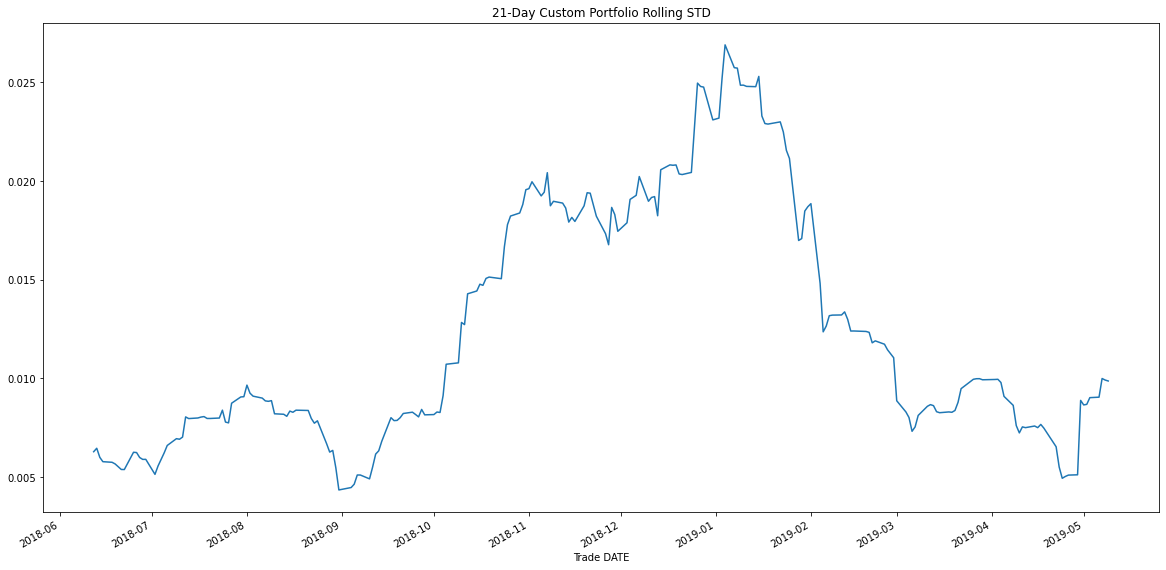

In [274]:
# Calculate rolling standard deviation
custom_returns.rolling(window=21).std()

# Plot rolling standard deviation
custom_returns.rolling(window=21).std().plot(title='21-Day Custom Portfolio Rolling STD', figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

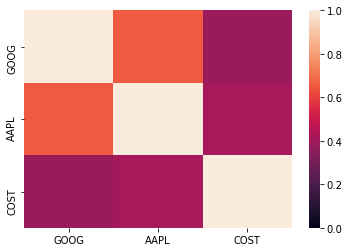

In [276]:
# Calculate and plot the correlation
correlations = portfolio_returns.corr()
correlations
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlations, vmin =0, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'60-Day Custom Portfolio Beta Trend'}>

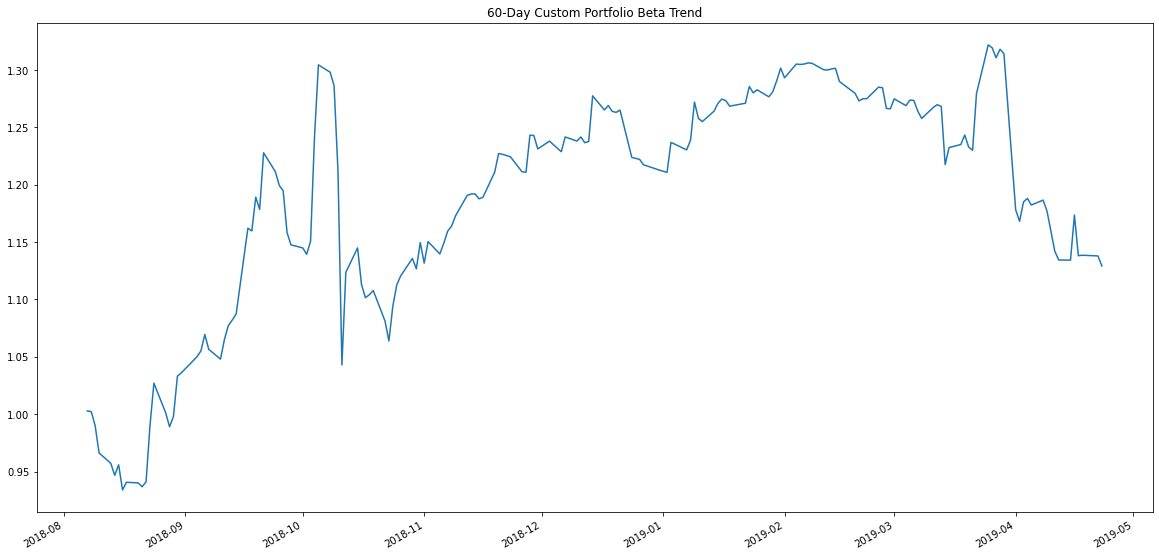

In [277]:
# Calculate and plot Beta
covariances = custom_returns.rolling(window=60).cov(combined_df['S&P 500'])

# Calculate variance of S&P 500
variances = combined_df['S&P 500'].rolling(window=60).var()

# Computing beta
betas = covariances / variances

# Plot beta trend
betas.plot(title='60-Day Custom Portfolio Beta Trend', figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [289]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio = (portfolio_returns.mean() * 252) / annportfolio_std
sharpe_ratio

GOOG    0.438280
AAPL    0.510276
COST    1.155284
dtype: float64

<AxesSubplot:title={'center':'Custom Portfolio Sharpe Ratio'}>

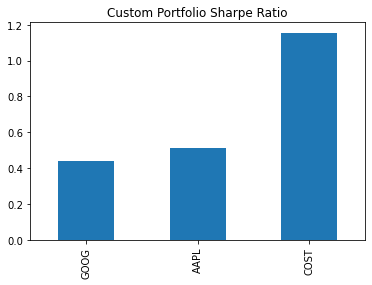

In [287]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Custom Portfolio Sharpe Ratio")

### How does your portfolio do?

Write your answer here!

In [291]:
#The aggregated sharpe ratio of the three stocks in the Custom Portfolio is 0.70, which outperforms all of the portfolios except Algo 1.
#Additionally, Algo 1 also outperforms the second highest individual stock, Cotsco, which is in the Custom Portfolio. 